In [1]:
!pip uninstall keras
!pip uninstall tensorflow

Uninstalling Keras-2.4.3:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/Keras-2.4.3.dist-info/*
    /usr/local/lib/python3.6/dist-packages/docs/*
    /usr/local/lib/python3.6/dist-packages/keras/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.6/dist-packages/docs/md_autogen.py
    /usr/local/lib/python3.6/dist-packages/docs/update_docs.py
Proceed (y/n)? y
  Successfully uninstalled Keras-2.4.3
Uninstalling tensorflow-2.3.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-2.3.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
Proceed (y/n)? y
y
y
  Successfully uninstalled tensorflow-2.3.0


In [2]:
!pip install tensorflow==1.15

     |████████████████████████████████| 412.3MB 19kB/s 
     |████████████████████████████████| 51kB 6.3MB/s 
     |████████████████████████████████| 512kB 49.4MB/s 
     |████████████████████████████████| 3.8MB 45.3MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=1b50471ef5f044aed38a0e1cdb78eeba7458ff0d3c50a57bdf1150b91f92f675
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: fancyimpute 0.4.3 requires keras>=2.0.0, which is not installed.
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing i

In [3]:
!pip install keras==2.1.3

     |████████████████████████████████| 327kB 6.7MB/s 
ERROR: textgenrnn 1.4.1 has requirement keras>=2.1.5, but you'll have keras 2.1.3 which is incompatible.


In [4]:
import tensorflow as tf
import keras
print(tf.__version__)
print(keras.__version__)

1.15.0
2.1.3


Using TensorFlow backend.


In [5]:
!pip install scipy==1.1.0

     |████████████████████████████████| 31.2MB 157kB/s 
ERROR: umap-learn 0.4.6 has requirement scipy>=1.3.1, but you'll have scipy 1.1.0 which is incompatible.
ERROR: plotnine 0.6.0 has requirement scipy>=1.2.0, but you'll have scipy 1.1.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1


In [3]:
import colorsys
import imghdr
import os
import random
from keras import backend as K

import numpy as np
from PIL import Image, ImageDraw, ImageFont

def read_classes(classes_path):
    with open(classes_path) as f:
        class_names = f.readlines()
    class_names = [c.strip() for c in class_names]
    return class_names

def read_anchors(anchors_path):
    with open(anchors_path) as f:
        anchors = f.readline()
        anchors = [float(x) for x in anchors.split(',')]
        anchors = np.array(anchors).reshape(-1, 2)
    return anchors

def generate_colors(class_names):
    hsv_tuples = [(x / len(class_names), 1., 1.) for x in range(len(class_names))]
    colors = list(map(lambda x: colorsys.hsv_to_rgb(*x), hsv_tuples))
    colors = list(map(lambda x: (int(x[0] * 255), int(x[1] * 255), int(x[2] * 255)), colors))
    random.seed(10101)  # Fixed seed for consistent colors across runs.
    random.shuffle(colors)  # Shuffle colors to decorrelate adjacent classes.
    random.seed(None)  # Reset seed to default.
    return colors

def scale_boxes(boxes, image_shape):
    """ Scales the predicted boxes in order to be drawable on the image"""
    height = image_shape[0]
    width = image_shape[1]
    image_dims = K.stack([height, width, height, width])
    image_dims = K.reshape(image_dims, [1, 4])
    boxes = boxes * image_dims
    return boxes

def preprocess_image(img_path, model_image_size):
    image_type = imghdr.what(img_path)
    image = Image.open(img_path)
    resized_image = image.resize(tuple(reversed(model_image_size)), Image.BICUBIC)
    image_data = np.array(resized_image, dtype='float32')
    image_data /= 255.
    image_data = np.expand_dims(image_data, 0)  # Add batch dimension.
    return image, image_data

def draw_boxes(image, out_scores, out_boxes, out_classes, class_names, colors):
    
    from PIL import ImageFont
    from io import BytesIO

    with open("/content/futur.ttf", "rb") as f:
      bytes_font = BytesIO(f.read())
    font = ImageFont.truetype(bytes_font,size=np.floor(3e-2 * image.size[1] + 0.5).astype('int32'))
    #font = ImageFont.truetype(font='font/FiraMono-Medium.otf',size=np.floor(3e-2 * image.size[1] + 0.5).astype('int32'))
    thickness = (image.size[0] + image.size[1]) // 300

    for i, c in reversed(list(enumerate(out_classes))):
        predicted_class = class_names[c]
        box = out_boxes[i]
        score = out_scores[i]

        label = '{} {:.2f}'.format(predicted_class, score)

        draw = ImageDraw.Draw(image)
        label_size = draw.textsize(label, font)

        top, left, bottom, right = box
        top = max(0, np.floor(top + 0.5).astype('int32'))
        left = max(0, np.floor(left + 0.5).astype('int32'))
        bottom = min(image.size[1], np.floor(bottom + 0.5).astype('int32'))
        right = min(image.size[0], np.floor(right + 0.5).astype('int32'))
        print(label, (left, top), (right, bottom))

        if top - label_size[1] >= 0:
            text_origin = np.array([left, top - label_size[1]])
        else:
            text_origin = np.array([left, top + 1])

        # My kingdom for a good redistributable image drawing library.
        for i in range(thickness):
            draw.rectangle([left + i, top + i, right - i, bottom - i], outline=colors[c])
        draw.rectangle([tuple(text_origin), tuple(text_origin + label_size)], fill=colors[c])
        draw.text(text_origin, label, fill=(0, 0, 0), font=font)
        del draw

Using TensorFlow backend.


In [4]:
!git clone https://github.com/kavyatripathi/YAD2K

Cloning into 'YAD2K'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 254 (delta 3), reused 0 (delta 0), pack-reused 243
Receiving objects: 100% (254/254), 2.36 MiB | 14.54 MiB/s, done.
Resolving deltas: 100% (109/109), done.


In [5]:
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import scipy.io
import scipy.misc
import numpy as np
import pandas as pd
import PIL
import tensorflow as tf
from skimage.transform import resize
#import tensorflow.keras.backend as K
from keras.layers import Input, Lambda, Conv2D
from keras.models import load_model, Model

from YAD2K.yad2k.models.keras_yolo import yolo_head, yolo_boxes_to_corners, preprocess_true_boxes, yolo_loss, yolo_body

In [6]:
def yolo_filter_boxes(box_confidence, boxes, box_class_probs, threshold = .6):
    box_scores = box_confidence*box_class_probs
    box_classes = K.argmax(box_scores,-1)
    box_class_scores = K.max(box_scores,-1)
    filtering_mask = box_class_scores>threshold
    scores = tf.boolean_mask(box_class_scores,filtering_mask)
    boxes = tf.boolean_mask(boxes,filtering_mask)
    classes = tf.boolean_mask(box_classes,filtering_mask)
 
    return scores, boxes, classes

In [7]:
def iou(box1, box2):
    xi1 = max(box1[0],box2[0])
    yi1 = max(box1[1],box2[1])
    xi2 = min(box1[2],box2[2])
    yi2 = min(box1[3],box2[3])
    inter_area = (yi2-yi1)*(xi2-xi1)
    box1_area = (box1[3]-box1[1])*(box1[2]-box1[0])
    box2_area = (box2[3]-box2[1])*(box2[2]-box2[0])
    union_area = box1_area+box2_area-inter_area
    iou = inter_area/union_area
 
    return iou

In [8]:

def yolo_non_max_suppression(scores, boxes, classes, max_boxes = 10, iou_threshold = 0.5):
    max_boxes_tensor = K.variable(max_boxes, dtype='int32')
    K.get_session().run(tf.variables_initializer([max_boxes_tensor]))
    nms_indices = tf.image.non_max_suppression(boxes,scores,max_boxes,iou_threshold)
    scores = K.gather(scores,nms_indices)
    boxes = K.gather(boxes,nms_indices)
    classes = K.gather(classes,nms_indices)

    return scores, boxes, classes

In [9]:
yolo_outputs = (tf.random.normal([19, 19, 5, 1], mean=1, stddev=4, seed = 1),
                   tf.random.normal([19, 19, 5, 2], mean=1, stddev=4, seed = 1),
                   tf.random.normal([19, 19, 5, 2], mean=1, stddev=4, seed = 1),
                   tf.random.normal([19, 19, 5, 80], mean=1, stddev=4, seed = 1))

In [10]:
def yolo_eval(yolo_outputs, image_shape = (720., 1280.), max_boxes=10, score_threshold=.6, iou_threshold=.5):
    box_confidence, box_xy, box_wh, box_class_probs = yolo_outputs
    boxes = yolo_boxes_to_corners(box_xy, box_wh)
    scores, boxes, classes = yolo_filter_boxes(box_confidence, boxes, box_class_probs, threshold = score_threshold)
    boxes = scale_boxes(boxes, image_shape)
    scores, boxes, classes = yolo_non_max_suppression(scores, boxes, classes, max_boxes, iou_threshold)

    return scores, boxes, classes

In [11]:
scores, boxes, classes = yolo_eval(yolo_outputs)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where








In [12]:
with tf.Session() as test_b:
    print("scores[2] = " + str(scores[2].eval()))
    print("boxes[2] = " + str(boxes[2].eval()))
    print("classes[2] = " + str(classes[2].eval()))

scores[2] = 138.79124
boxes[2] = [1292.3297  -278.52167 3876.9893  -835.56494]
classes[2] = 54


In [13]:
!wget http://pjreddie.com/media/files/yolo.weights

--2020-11-17 05:29:59--  http://pjreddie.com/media/files/yolo.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/yolo.weights [following]
--2020-11-17 05:30:00--  https://pjreddie.com/media/files/yolo.weights
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 203934260 (194M) [application/octet-stream]
Saving to: ‘yolo.weights’

yolo.weights        100%[===================>] 194.49M   572KB/s    in 8m 18s  

2020-11-17 05:38:20 (400 KB/s) - ‘yolo.weights’ saved [203934260/203934260]



In [14]:
!python /content/YAD2K/yad2k.py /content/YAD2K/hello.cfg /content/yolo.weights /content/yolo.h5

Using TensorFlow backend.
Loading weights.
Weights Header:  [       0        1        0 32013312]
Parsing Darknet config.
Creating Keras model.


Parsing section net_0
Parsing section convolutional_0
conv2d bn leaky (3, 3, 3, 32)




2020-11-17 05:38:27.663369: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2020-11-17 05:38:27.670433: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2020-11-17 05:38:27.670816: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x1c51640 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-11-17 05:38:27.670872: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-11-17 05:38:27.675020: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-11-17 05:38:27

In [15]:
sess = K.get_session()
class_names = read_classes("/content/YAD2K/model_data/coco_classes.txt")
anchors = read_anchors("/content/yolo_anchors.txt")
yolo_model = load_model("/content/yolo.h5")

/usr/local/lib/python3.6/dist-packages/keras/models.py:255: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [16]:
yolo_outputs = yolo_head(yolo_model.output, anchors, len(class_names))

In [17]:
def predict(sess, image_file):
    image, image_data = preprocess_image(image_file, model_image_size = (608, 608))
    out_scores, out_boxes, out_classes = sess.run([scores, boxes, classes], feed_dict={yolo_model.input: image_data, K.learning_phase(): 0})

    print('Found {} boxes for {}'.format(len(out_boxes), image_file))

    # Generate colors for drawing bounding boxes.
    colors = generate_colors(class_names)

    # Draw bounding boxes on the image file
    draw_boxes(image, out_scores, out_boxes, out_classes, class_names, colors)

    # Save the predicted bounding box on the image
    image.save(os.path.join("out", image_file), quality=90)

    # Display the results in the notebook
    output_image = scipy.misc.imread(os.path.join("out", image_file))

    plt.figure(figsize=(12,12))
    imshow(output_image)

    return out_scores, out_boxes, out_classes

In [19]:
img = plt.imread('/content/img.jpg')
##image_shape = None, None, None, float(img.shape[1]),float(img.shape[0])
image_shape=float(img.shape[0]), float(img.shape[1])
final_yolo_outputs = (yolo_outputs[2], yolo_outputs[0], yolo_outputs[1], yolo_outputs[3])
scores, boxes, classes = yolo_eval(final_yolo_outputs , image_shape)


In [20]:
yolo_outputs

(<tf.Tensor 'truediv_2:0' shape=(?, ?, ?, 5, 2) dtype=float32>,
 <tf.Tensor 'truediv_3:0' shape=(?, ?, ?, 5, 2) dtype=float32>,
 <tf.Tensor 'Sigmoid_1:0' shape=(?, ?, ?, 5, 1) dtype=float32>,
 <tf.Tensor 'Softmax:0' shape=(?, ?, ?, 5, 80) dtype=float32>)

Found 4 boxes for /content/img.jpg
car 0.71 (918, 281) (1197, 596)
car 0.77 (0, 256) (472, 569)
motorbike 0.80 (618, 329) (753, 544)
car 0.83 (376, 249) (642, 454)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


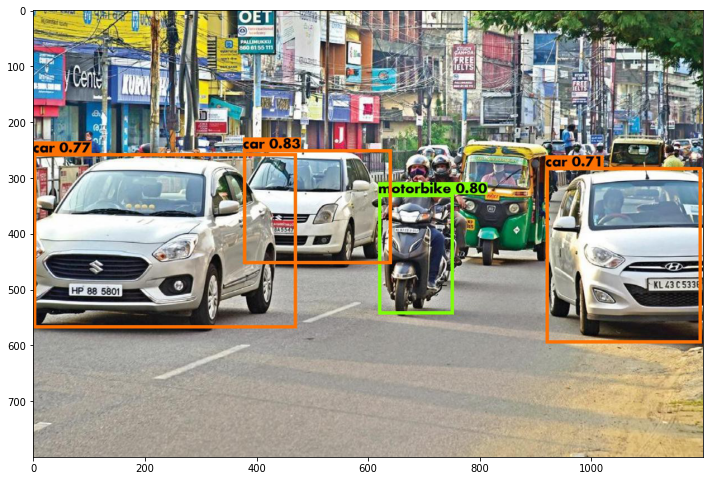

In [21]:
out_scores, out_boxes, out_classes = predict(sess, "/content/img.jpg")